In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("kanchi_rainfall.csv")

# Group by 'Station Code' and 'Year', then get the maximum rainfall value for each group
df_max = df.groupby(['Station Code', 'Year'])['RF in mm'].max().reset_index()

# Pivot the DataFrame to create a matrix with 'Station Code' as rows and 'Year' as columns
rainfall_matrix = df_max.pivot_table(index='Station Code', columns='Year', values='RF in mm')

# Display the resulting matrix
print(rainfall_matrix)

# Convert to numpy array if needed
rainfall_matrix_values = rainfall_matrix.values
print(rainfall_matrix_values)

Year           2019   2020   2021   2022
Station Code                            
CHEMBARMPAKM   93.0  139.4  189.0   95.2
KANCHEEPURAM   62.4  156.9  184.0   70.4
PADAPPAI      118.8  147.2  140.8  155.6
SRIPERUMDUR    98.8  183.0  105.2   90.8
UTHIRAMERUR    77.0   97.0  144.0  169.0
[[ 93.  139.4 189.   95.2]
 [ 62.4 156.9 184.   70.4]
 [118.8 147.2 140.8 155.6]
 [ 98.8 183.  105.2  90.8]
 [ 77.   97.  144.  169. ]]


Interpolated rainfall value at year 2020.5 for district 1: 144.075 mm


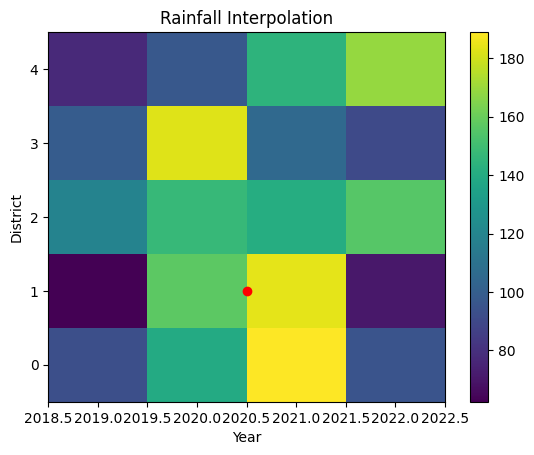

In [6]:
import matplotlib.pyplot as plt
def bilinear_interpolation(x, y, points):
    points = sorted(points)               # Sort the points list
    (x1, y1, q11), (x2, y2, q22) = points # Assign variables
    return (q11 * (x2 - x) * (y2 - y) +
            q22 * (x - x1) * (y - y1) +
            q21 * (x - x1) * (y2 - y) +
            q12 * (x2 - x) * (y - y1)) / ((x2 - x1) * (y2 - y1))

years = np.array([2019, 2020, 2021, 2022])
districts = np.array([0, 1, 2, 3, 4])

# Find the four known points surrounding the interpolation point
x1, x2 = 2019, 2021
y1, y2 = 0, 2
q11 = rainfall_matrix_values[2, 1]  # 2010, District 2
q12 = rainfall_matrix_values[2, 2]  # 2010, District 3
q21 = rainfall_matrix_values[3, 1]  # 2015, District 2
q22 = rainfall_matrix_values[3, 2]  # 2015, District 3

interp_year = 2020.5
interp_district = 1

interp_value = bilinear_interpolation(interp_year, interp_district, [(x1, y1, q11), (x2, y2, q22)])
print(f"Interpolated rainfall value at year {interp_year} for district {interp_district}: {interp_value} mm")


# Visualization for better understanding
fig, ax = plt.subplots()
c = ax.pcolormesh(years, districts, rainfall_matrix_values, shading='auto')
fig.colorbar(c, ax=ax)
ax.plot(interp_year, interp_district, 'ro')  # Mark the interpolated point
plt.xlabel('Year')
plt.ylabel('District')
plt.title('Rainfall Interpolation')
plt.show()